In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the dataset
file = r"C:\NISHANT\skill acadamy\Major Assignment\Machine Learning\oil_spill.csv"
data = pd.read_csv(file)

# Explore the data
print("Dataset:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# Check if there is missing values
print("\nMissing Values :")
print(data.isnull().sum())

# Handling Missing Values
# Using mean imputation for missing numerical values
imputer = SimpleImputer(strategy="mean")
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Scale the data
scaler = StandardScaler()
features = data_imputed.drop(columns=["target"])
features_scaled = scaler.fit_transform(features)

# Reconstruct the Dataframe with scaled features
data_preprocessed = pd.DataFrame(features_scaled, columns=features.columns)
data_preprocessed["target"] = data_imputed["target"]

# print the data
print(data_preprocessed.head())

dataset:
   f_1    f_2      f_3     f_4  f_5       f_6    f_7   f_8      f_9  f_10  \
0    1   2558  1506.09  456.63   90   6395000  40.88  7.89  29780.0  0.19   
1    2  22325    79.11  841.03  180  55812500  51.11  1.21  61900.0  0.02   
2    3    115  1449.85  608.43   88    287500  40.42  7.34   3340.0  0.18   
3    4   1201  1562.53  295.65   66   3002500  42.40  7.97  18030.0  0.19   
4    5    312   950.27  440.86   37    780000  41.43  7.03   3350.0  0.17   

   ...     f_41      f_42     f_43     f_44   f_45  f_46      f_47   f_48  \
0  ...  2850.00   1000.00   763.16   135.46   3.73     0  33243.19  65.74   
1  ...  5750.00  11500.00  9593.48  1648.80   0.60     0  51572.04  65.73   
2  ...  1400.00    250.00   150.00    45.13   9.33     1  31692.84  65.81   
3  ...  6041.52    761.58   453.21   144.97  13.33     1  37696.21  65.67   
4  ...  1320.04    710.63   512.54   109.16   2.58     0  29038.17  65.66   

   f_49  target  
0  7.95       1  
1  6.26       0  
2  7.84    


Class Distribution:
target
0.0    896
1.0     41
Name: count, dtype: int64


C:\Users\Nishant shah\AppData\Local\Temp\ipykernel_34116\3636859264.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values,palette="viridis",legend=False)


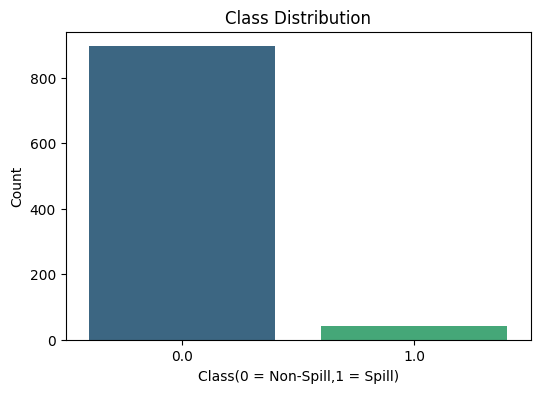


Statistical Summary of features:
<bound method NDFrame.describe of           f_1        f_2       f_3       f_4       f_5        f_6       f_7  \
0   -1.240922   1.152390  1.346434 -0.793007  0.129657   1.469091 -0.185871   
1   -1.225524  11.389546 -1.033273 -0.057342  2.114766  14.374844  0.618905   
2   -1.210126  -0.112818  1.252645 -0.502492  0.085544  -0.125929 -0.222058   
3   -1.194727   0.449611  1.440556 -1.101091 -0.399705   0.583114 -0.066295   
4   -1.179329  -0.010794  0.419520 -0.823188 -1.039352   0.002691 -0.142604   
..        ...        ...       ...       ...       ...        ...       ...   
932  1.823348  -0.166161 -1.011076 -0.969479  1.122212  -0.175628  1.272638   
933  1.838746  -0.166679 -1.000403 -1.191058  1.651574  -0.177743  1.289945   
934  1.854145  -0.165126 -1.123276 -0.846153 -1.326090  -0.171397  1.329279   
935  1.869543  -0.167197 -1.005106 -0.803208 -0.355592  -0.179858  1.310398   
936  1.884941  -0.166679 -1.152310 -1.215766  1.122212  -0.1777

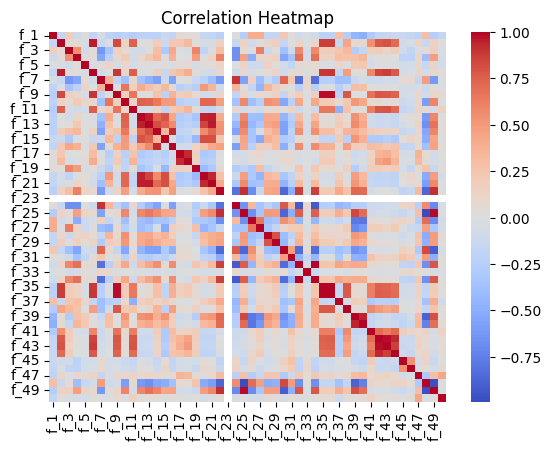

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = data_preprocessed["target"].value_counts()
print("\nClass Distribution:")
print(class_counts)

# Plot the Distribution
plt.figure(figsize=(6, 4))
sns.barplot(
    x=class_counts.index, y=class_counts.values, palette="viridis", legend=False
)
plt.title("Class Distribution")
plt.xlabel("Class(0 = Non-Spill,1 = Spill)")
plt.ylabel("Count")
plt.show()

# Statistical summary of features
print("\nStatistical Summary of features:")
print(data_preprocessed.describe)

# Correlation heatmap
plt.figure(figure=(10, 8))
sns.heatmap(data_preprocessed.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# split data into features(x) and target(y)
X = data_preprocessed.drop(columns=["target"])
Y = data_preprocessed["target"]

# Train-Test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Apply Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, Y_train)

# Evaluate Bagging
bagging_pred = bagging_model.predict(X_test)
print("\nBagging Classifier Performance :")
print(f"Accuracy:{accuracy_score(Y_test,bagging_pred)}")
print(classification_report(Y_test, bagging_pred))

# Apply Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Performace:")
print(f"Accuracy: {accuracy_score(Y_test,rf_pred)}")
print(classification_report(Y_test, rf_pred))


Bagging Classifier Performance :
Accuracy:0.973404255319149
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       182
         1.0       0.56      0.83      0.67         6

    accuracy                           0.97       188
   macro avg       0.77      0.91      0.83       188
weighted avg       0.98      0.97      0.98       188


Random Forest Performace:
Accuracy: 0.9680851063829787
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       182
         1.0       0.50      0.33      0.40         6

    accuracy                           0.97       188
   macro avg       0.74      0.66      0.69       188
weighted avg       0.96      0.97      0.96       188



In [15]:
import joblib

# Save the best model (assuming Random Forest performed better)
joblib.dump(rf_model, "best_model_rf.pkl")
print("\nModel saved as 'best_model_rf.pkl'")

# Load the model
loaded_model = joblib.load("best_model_rf.pkl")
print("\nModel loaded successfully.")


Model saved as 'best_model_rf.pkl'

Model loaded successfully.


In [16]:
import numpy as np

# Randomly pick 20 rows
random_sample = data_preprocessed.sample(n=20, random_state=42)

# Separate features and target
X_new = random_sample.drop(columns=["target"])
y_true = random_sample["target"]

# Predict using the loaded model
y_pred = loaded_model.predict(X_new)

# Display predictions
print("\nPredictions on Random Sample:")
print(f"True Labels: {y_true.values}")
print(f"Predicted Labels: {y_pred}")


Predictions on Random Sample:
True Labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted Labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
